**Student BENREKIA Mohamed Ali (IASD 2021-2022)**

In [ ]:
%matplotlib inline
import numpy as np
from scipy.linalg import norm 


import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading data

In [ ]:
!wget https://raw.githubusercontent.com/nishitpatel01/predicting-age-of-abalone-using-regression/master/Abalone_data.csv

In [ ]:
# Use this code to read from a CSV file.
import pandas as pd
U = pd.read_csv('/content/Abalone_data.csv')

In [ ]:
U.shape

(4176, 9)

In [ ]:
U.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   int64  
 2   Diameter        4176 non-null   int64  
 3   Height          4176 non-null   int64  
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


In [ ]:
U.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,70,53,18,45.1,19.9,9.7,14.0,7
1,F,106,84,27,135.4,51.3,28.3,42.0,9
2,M,88,73,25,103.2,43.1,22.8,31.0,10
3,I,66,51,16,41.0,17.9,7.9,11.0,7
4,I,85,60,19,70.3,28.2,15.5,24.0,8


In [ ]:
U.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4171,F,113,90,33,177.4,74.0,47.8,49.8,11
4172,M,118,88,27,193.2,87.8,42.9,52.1,10
4173,M,120,95,41,235.2,105.1,57.5,61.6,9
4174,F,125,97,30,218.9,106.2,52.2,59.2,10
4175,M,142,111,39,389.7,189.1,75.3,99.0,12


In [ ]:
U.Sex=U.Sex.astype('category').cat.codes
U.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,70,53,18,45.1,19.9,9.7,14.0,7
1,0,106,84,27,135.4,51.3,28.3,42.0,9
2,2,88,73,25,103.2,43.1,22.8,31.0,10
3,1,66,51,16,41.0,17.9,7.9,11.0,7
4,1,85,60,19,70.3,28.2,15.5,24.0,8


In [ ]:
U.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,1.052682,104.801724,81.578305,27.905412,165.763506,71.879957,36.122534,47.770426,9.932471
std,0.822208,24.020509,19.849906,8.365278,98.084710,44.395943,21.924091,27.842510,3.223601
min,0.000000,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,0.000000,90.000000,70.000000,23.000000,88.300000,37.200000,18.675000,26.000000,8.000000
50%,1.000000,109.000000,85.000000,28.000000,159.950000,67.200000,34.200000,46.800000,9.000000
75%,2.000000,123.000000,96.000000,33.000000,230.650000,100.400000,50.600000,65.800000,11.000000
max,2.000000,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


In [ ]:
U.sample(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
753,2,130,103,35,296.1,105.9,54.4,105.0,20
1914,0,120,94,27,194.0,93.1,39.1,52.8,11
2425,1,113,87,31,156.4,54.3,33.6,57.0,14
545,2,51,39,13,16.0,6.3,3.6,5.4,8
1645,1,116,89,25,141.9,60.6,28.1,47.0,9
2619,0,139,110,31,369.9,153.4,88.4,83.5,10
2418,0,93,72,24,95.3,38.4,22.5,32.0,10
349,0,122,99,37,230.6,107.2,58.1,49.0,8
3201,0,124,97,44,302.2,101.9,56.8,102.0,17
2846,2,125,100,26,216.4,115.7,40.9,50.0,8


In [ ]:
U.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [ ]:
U.dtypes

Sex                  int8
Length              int64
Diameter            int64
Height              int64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38650a3290>,
      dtype=object)

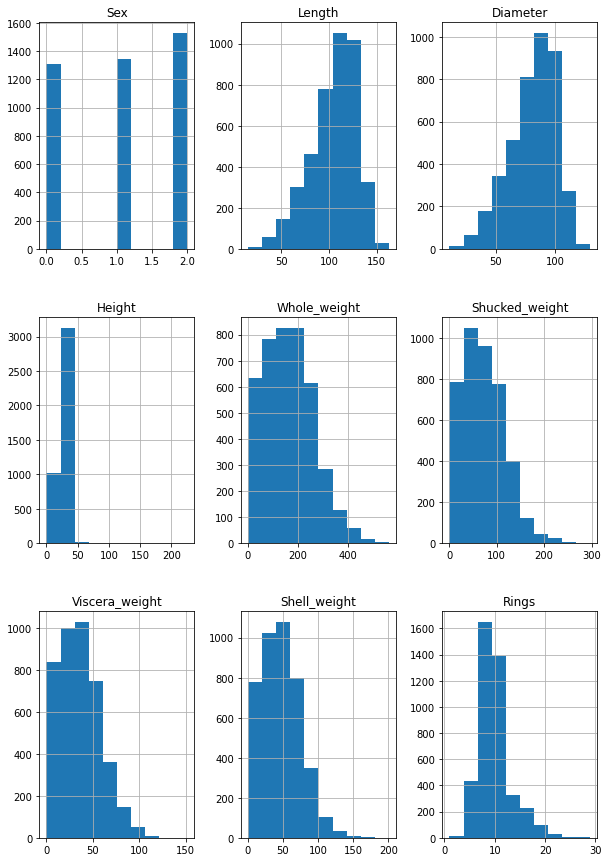

In [ ]:
U.hist(figsize=(10,15))

In [ ]:
corr = U.corr()
corr

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.035915,-0.038762,-0.041796,-0.021219,-0.001205,-0.031873,-0.034686,-0.035076
Length,-0.035915,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,-0.038762,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,-0.041796,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole_weight,-0.021219,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked_weight,-0.001205,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera_weight,-0.031873,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell_weight,-0.034686,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,-0.035076,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


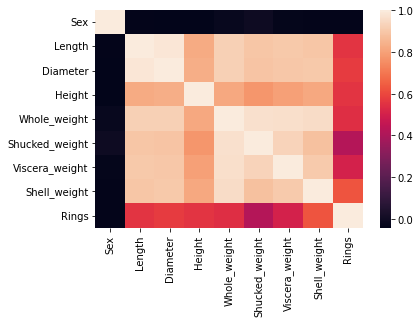

In [ ]:
sns.heatmap(corr, annot=False)

In [ ]:
# split train - validation

shuffle_df = U.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(U))

# Split your dataset 
train_set = shuffle_df[:train_size]
valid_set = shuffle_df[train_size:]

#split feature target

x_train = train_set.drop("Rings",axis=1).to_numpy()
y_train = train_set["Rings"]

x_valid = valid_set.drop("Rings",axis=1)
y_valid = valid_set["Rings"]

In [ ]:
#no need
mA = x_train.mean(axis=0)
sA = x_train.std(axis=0)
x_train = (x_train-mA)/sA
x_valid = (x_valid-mA)/sA

In [ ]:
# no need
m = y_train.mean()
y_train = y_train-m
y_valid = y_valid-m

In [ ]:
x_train.shape[1]

8

# Problem definition (Linear regression)

In [ ]:
class RegPb(object):
    '''
        A class for regression problems with linear models.
        
        Attributes:
            X: Data matrix (features)
            y: Data vector (labels)
            n,d: Dimensions of X
            loss: Loss function to be considered in the regression
                'l2': Least-squares loss
            lbda: Regularization parameter
    '''
   
    # Instantiate the class
    def __init__(self, X, y,lbda=0,loss='l2'):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.loss = loss
        self.lbda = lbda
        
    
    # Objective value
    def fun(self, w):
        if self.loss=='l2':
          return np.square(self.X.dot(w) - self.y).mean() + self.lbda * norm(w) ** 2
        else:
          return  np.square(self.X.dot(w) - self.y).mean()


    """
    # Partial objective value
    def f_i(self, i, w):
        if self.loss=='l2':
            return norm(self.X[i].dot(w) - self.y[i]) ** 2 / (2.) + self.lbda * norm(w) ** 2
        else:
          return norm(self.X[i].dot(w) - self.y[i]) ** 2 / (2.)
    """
    
    # Full gradient computation
    def grad(self, w):
        if self.loss=='l2':
          return self.X.T.dot(self.X.dot(w) - self.y) * (2/self.n)  + 2 * self.lbda * w
        else:
          return self.X.T.dot(self.X.dot(w) - self.y) * (2/self.n)
    
    # Partial gradient
    def grad_i(self,i,w):
        x_i = self.X[i]
        if self.loss=='l2':
          return (2/self.n) * (x_i.dot(w) - self.y[i]) * x_i + 2 * self.lbda*w
        else:
          return (2/self.n) * (x_i.dot(w) - self.y[i]) * x_i

    """
    # Lipschitz constant for the gradient
    def lipgrad(self):
        if self.loss=='l2':
            L = norm(self.X, ord=2) ** 2 / self.n + self.lbda
    """


In [ ]:
lda = 1. / x_train.shape[0] ** (0.5)
pblinreg = RegPb(x_train, y_train, lbda=lda, loss='l2')

**PCA**

In [ ]:
U, s, V = np.linalg.svd(x_train.T.dot(x_train))

Text(0.5, 0, 'Dimensions')

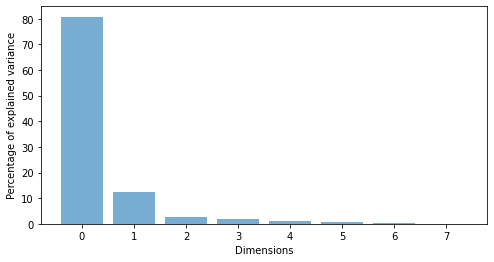

In [ ]:
eig_values, eig_vectors = s, U
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(8), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [ ]:


# calculating our new axis
pc1 = x_train.dot(eig_vectors[:,0])
pc2 = x_train.dot(eig_vectors[:,1])



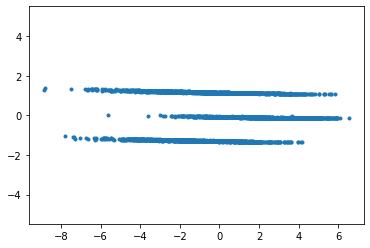

In [ ]:
plt.plot(pc1, pc2, '.')
plt.axis('equal');

# Btach Gradietn Descent

In [ ]:
def batch_grad(w0,problem, stepchoice=0, lr= 0.01, n_iter=1000,verbose=False):
 
 # objective history
    objvals = []
 # Number of samples
    n = problem.n
    
    # Initial value of current iterate  
    w = w0.copy()
    nw = norm(w)
 # Current objective
    obj = problem.fun(w) 
    objvals.append(obj);
  # Initialize iteration counter
    k=0
  
  # Plot initial quantities of interest
    if verbose:
        print("Gradient Descent")
        print(' | '.join([name.center(8) for name in ["iter", "MSE_Loss"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))
  # Main loop
    while (k < n_iter ):#and nw < 10**100
        # gradient calculation
        gr = np.zeros(d)
        gr = problem.grad(w)
        

        
           
        if stepchoice==0:
            w[:] = w - lr * gr
        elif stepchoice>0:
          if (k*nb*10) % n == 0:
            sk = float(lr/stepchoice)
            w[:] = w - sk * gr
        
        nw = norm(w) #Computing the norm to measure divergence 
        obj = problem.fun(w)
        
       
        
        k += 1
        # Plot quantities of interest at the end of every epoch only
        objvals.append(obj)
        if verbose:
          print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))     
    
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if k % n_iter > 0:
        objvals.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))              
    
    # Outputs
    
    w_output = w.copy()
    
    return w_output, np.array(objvals)

**Different Learning rates**

In [ ]:
nb_epochs = 100
n = pblinreg.n
d = pblinreg.d
w0 = np.zeros(d)
valsstep0 = [0.1,0.01,0.001,0.0001,0.00001]
nvals = len(valsstep0)

objs = np.zeros((nvals,nb_epochs+1))

for val in range(nvals):
    w_temp, objs_temp = batch_grad(w0,pblinreg, lr=valsstep0[val], n_iter=nb_epochs)
    objs[val] = objs_temp

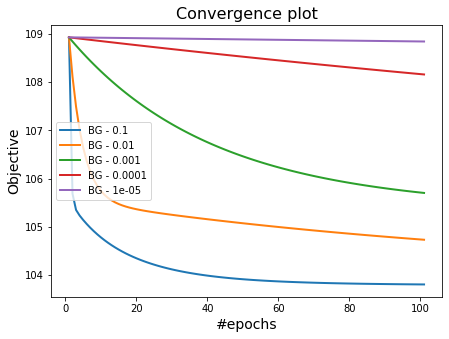

In [ ]:
epochs = range(1,102)
plt.figure(figsize=(7, 5))

for val in range(nvals):
    plt.plot(epochs, objs[val], label="BG - "+str(valsstep0[val]), lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

plt.show()

# Accelerated Gradient Descent

In [ ]:
def accelerated_grad(w_0,problem,lr=0.001,method="nesterov",momentum=None,n_iter=100,verbose=False): 
    """
        A generic code for Nesterov's accelerated gradient method.
        
        Inputs:
            w0: Initial vector
            problem: Problem structure
            lr: Learning rate
            method: Type of acceleration technique that is used
                'nesterov': Accelerated gradient for convex functions (Nesterov)
            momentum: Constant value for the momentum parameter (only used if method!='nesterov')
            n_iter: Number of iterations
            verbose: Boolean value indicating whether the outcome of every iteration should be displayed
            
        Outputs:
            z_output: Final iterate of the method
            objvals: History of function values in z (output as a Numpy array of length n_iter+1)
    """
    
    ############
    # Initial step: Compute and plot some initial quantities

    # objective history
    objvals = []
    
    
    # Initial value of current and next iterates   
    w = w0.copy()
    w_new = w0.copy()
    z = w0.copy()
    
    if method=='nesterov':
        # Initialize parameter sequence
        tk = 0
        tkp1 = 1
        momentum = 0
 
    # Initialize iteration counter
    k=0
    
    # Initial objective
    obj = problem.fun(z)
    objvals.append(obj);
    
    # Plot the initial values if required
    if verbose:
        print("Accelerated Gradient/"+method)
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))
    
    #######################
    # Main loop
    while (k < n_iter):
        
        # Perform the accelerated iteration
     
        # Gradient step
        g = problem.grad(z)
        w_new[:] = z - lr * g
        # Momentum step
        z[:] = w_new + momentum*(w_new-w)
        # Update sequence
        w[:] = w_new[:]
        
        
        # Adjusting the momentum parameter if needed
        if method=='nesterov':
            tkp1 = 0.5*(1+np.sqrt(1+4*(tk**2)))
            momentum = (tk-1)/tkp1
            tk = tkp1
        
        # Compute and plot the new objective value and distance to the minimum
        
        obj = problem.fun(z)
        objvals.append(obj)
        
        # Plot these values if required
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))   
        
        # Increment the iteration counter
        k += 1
    
    # End loop
    #######################
    
    
    # Output
    z_output = z.copy()
          
    return z_output, np.array(objvals)

**GD Vs NAGD**

In [ ]:
nb_epochs = 100
n = pblinreg.n
d = pblinreg.d
w0 = np.zeros(d)

learning_rate = 0.01

w_g, obj_g = batch_grad(w0,pblinreg, lr=learning_rate, n_iter=nb_epochs)
w_n, obj_n = accelerated_grad(w0,pblinreg, lr=learning_rate, n_iter=nb_epochs)


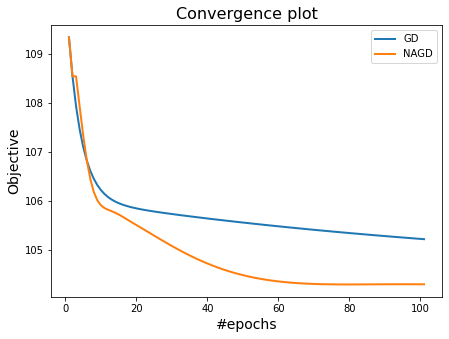

In [ ]:
epochs = range(1,102)
plt.figure(figsize=(7, 5))

plt.plot(epochs, obj_g, label="GD", lw=2)
plt.plot(epochs, obj_n, label="NAGD", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

plt.show()

# Stochastic gradient Descent

In [ ]:
def stoch_grad(w0,problem, stepchoice=0, lr= 0.01, n_iter=1000,nb=1,average=0,scaling=0,with_replace=False,verbose=False): 
    """
        A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            problem: Problem structure
                problem.fun() returns the objective function, which is assumed to be a finite sum of functions
                problem.n returns the number of components in the finite sum
                problem.grad_i() returns the gradient of a single component f_i
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to lr
                1: Step size decreasing in lr/ stepchoice
            lr: Learning rate
            n_iter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
                problem.n: Classical gradient descent (default value)
            average: Indicates whether the method computes the average of the iterates 
                0: No averaging (default)
                1: With averaging
            scaling: Use a diagonal scaling
                0: No scaling (default)
                1: Average of magnitudes (RMSProp)
                2: Normalization with magnitudes (Adagrad)
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            verbose: Boolean indicating whether information should be plot at every iteration (Default: False)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
    """
    ############
    # Initial step: Compute and plot some initial quantities

    # objective history
    objvals = []
    
    # iterates distance to the minimum history
    normits = []
    """
    # Lipschitz constant
    L = problem.lipgrad()
    """
    # Number of samples
    n = problem.n
    
    # Initial value of current iterate  
    w = w0.copy()
    nw = norm(w)
    
    # Average (if needed)
    if average:
            wavg=np.zeros(len(w))
    
    #Scaling values
    if scaling>0:
        mu=1/(2 *(n ** (0.5)))
        v = np.zeros(d)
        beta = 0.8

    # Initialize iteration counter
    k=0
    
    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj);

    
    # Plot initial quantities of interest
    if verbose:
        print("Stochastic Gradient, batch size=",nb,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "MSE_Loss"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))
    
    ################
    # Main loop
    while (k < n_iter ):#and nw < 10**100
        # Draw the batch indices
        ik = np.random.choice(n,nb,replace=with_replace)# Batch gradient
        # Stochastic gradient calculation
        sg = np.zeros(d)
        for j in range(nb):
            gi = problem.grad_i(ik[j],w)
            sg = sg + gi
        sg = (1/nb)*sg
        
        if scaling>0:
            if scaling==1:
                # RMSProp update
                v = beta*v + (1-beta)*sg*sg
            elif scaling==2:
                # Adagrad update
                v = v + sg*sg 
            sg = sg/(np.sqrt(v+mu))

        
           
        if stepchoice==0:
            w[:] = w - lr * sg
        elif stepchoice>0:
          if (k*nb*10) % n == 0:
            sk = float(lr/stepchoice)
            w[:] = w - sk * sg
        
        nw = norm(w) #Computing the norm to measure divergence 
        
        if average:
            # If average, compute the average of the iterates
            wavg = k/(k+1) *wavg + w/(k+1) 
            obj = problem.fun(wavg)
        else:
            obj = problem.fun(w)
        
       
        
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if k % int(n/nb) == 0:
            objvals.append(obj)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))     
    
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*nb) % n > 0:
        objvals.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))              
    
    # Outputs
    if average:
        w_output = wavg.copy()
    else:
        w_output = w.copy()
    
    return w_output, np.array(objvals)

**Constant Vs Decreasing LR**

In [ ]:
nb_epochs = 60
n = pblinreg.n
d = pblinreg.d
w0 = np.zeros(d)

# Run a - GD with constant stepsize
w_a, obj_a = stoch_grad(w0,pblinreg, n_iter=nb_epochs,nb=n)


# Run b - Stochastic gradient with constant stepsize
# The version below may diverges, in which case the bound on norm(w) in the code will be triggered
w_b, obj_b = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1)

# Run Gradient descent with decreasing stepsize
w_c, obj_c = stoch_grad(w0,pblinreg, stepchoice=0.5, lr=0.2, n_iter=nb_epochs,nb=n)
# Run Stochastic gradient with decreasing stepsize
w_d, obj_d = stoch_grad(w0,pblinreg, stepchoice=0.5, lr=0.2, n_iter=nb_epochs*n,nb=1)

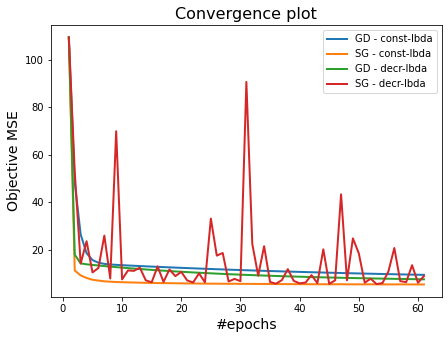

In [ ]:
epochs = range(1,62)

plt.figure(figsize=(7, 5))
plt.plot(epochs, obj_a, label="GD - const-lbda", lw=2)
plt.plot(epochs, obj_b, label="SG - const-lbda", lw=2)
plt.plot(epochs, obj_c, label="GD - decr-lbda", lw=2)
plt.plot(epochs, obj_d, label="SG - decr-lbda", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective MSE", fontsize=14)
plt.legend()



plt.show()

**Different Constant LR**

In [ ]:
nb_epochs = 60
n = pblinreg.n
d = pblinreg.d
w0 = np.zeros(d)
valsstep0 = [0.01,0.001,0.0001,0.00001]
nvals = len(valsstep0)

objs = np.zeros((nvals,nb_epochs+1))

for val in range(nvals):
    w_temp, objs_temp = stoch_grad(w0,pblinreg, lr=valsstep0[val], n_iter=nb_epochs*n,nb=1)
    objs[val] = objs_temp

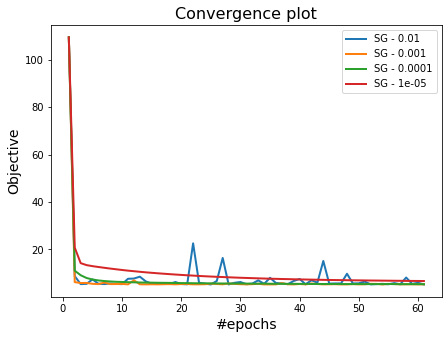

In [ ]:
plt.figure(figsize=(7, 5))

for val in range(nvals):
    plt.plot(epochs, objs[val], label="SG - "+str(valsstep0[val]), lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

plt.show()

**Different decreasing LR**

In [ ]:
nb_epochs = 60
n = pblinreg.n
nbset = 1
w0 = np.zeros(d)

decstep = [1,2,10,20,100]
nvals = len(decstep)

objs = np.zeros((nvals,nb_epochs+1))

for val in range(nvals):
    _, objs[val] = stoch_grad(w0,pblinreg,stepchoice=decstep[val],lr=0.02, n_iter=nb_epochs*n,nb=1)



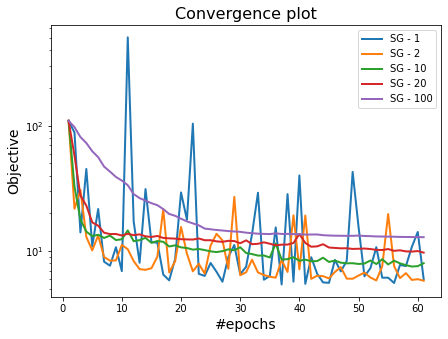

In [ ]:
plt.figure(figsize=(7, 5))

for val in range(nvals):
    plt.semilogy(epochs, objs[val], label="SG - "+str(decstep[val]), lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

plt.show()

**Different Batch size**

In [ ]:
nb_epochs = 100
n = pblinreg.n
w0 = np.zeros(d)



# Stochastic gradient (batch size 1)
w_a, obj_a= stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1)
# Batch stochastic gradient (batch size n/100)
nbset=int(n/100)
w_b, obj_b = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*100,nb=nbset)
# Batch stochastic gradient (batch size n/10)
nbset=int(n/10)
w_c, obj_c = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=int(nb_epochs*10),nb=nbset)
# Batch stochastic gradient (batch size n/2)
nbset=int(n/2)
w_d, obj_d = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=int(nb_epochs*2),nb=nbset)

# Gradient descent (batch size n, taken without replacement)
w_f, obj_f = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=int(nb_epochs),nb=n)

In [ ]:
nbset=int(n/100)
w_b, obj_b = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=int(nb_epochs*100),nb=nbset,verbose=True)
print(len(obj_b))

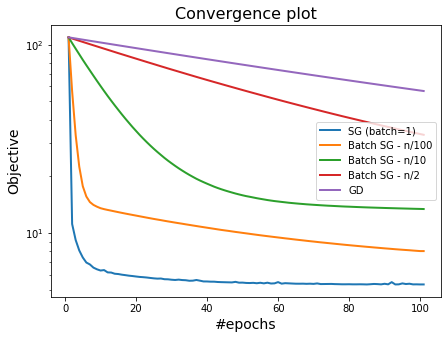

In [ ]:
epochs = range(1,102)
plt.figure(figsize=(7, 5))
plt.semilogy(epochs, obj_a, label="SG (batch=1)", lw=2)
plt.semilogy(epochs, obj_b,  label="Batch SG - n/100", lw=2)
plt.semilogy(epochs, obj_c,  label="Batch SG - n/10", lw=2)
plt.semilogy(epochs, obj_d,  label="Batch SG - n/2", lw=2)
plt.semilogy(epochs, obj_f,  label="GD", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()
plt.show()

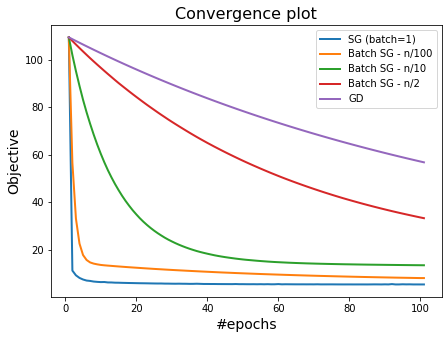

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(epochs, obj_a, label="SG (batch=1)", lw=2)
plt.plot(epochs, obj_b,  label="Batch SG - n/100", lw=2)
plt.plot(epochs, obj_c,  label="Batch SG - n/10", lw=2)
plt.plot(epochs, obj_d,  label="Batch SG - n/2", lw=2)
plt.plot(epochs, obj_f,  label="GD", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()
plt.show()

# Other variants for SGD

**batch with replacement**

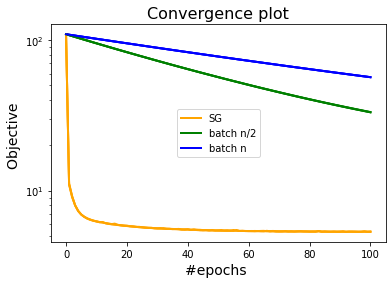

In [ ]:
#Batch with replacement for GD, SGD and Batch SGD
nb_epochs = 100
n = pblinreg.n
w0 = np.zeros(d)

nruns = 3

for i in range(nruns):
    # Run standard stochastic gradient (batch size 1)
    _, obj_a= stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1,with_replace=True)
    # Batch stochastic gradient (batch size n/10)
    nbset=int(n/2)
    _, obj_b= stoch_grad(w0,pblinreg, lr=0.0001, n_iter=int(nb_epochs*n/nbset),nb=nbset,with_replace=True)
    # Batch stochastic gradient (batch size n, with replacement)
    nbset=n
    _, obj_c=stoch_grad(w0,pblinreg, lr=0.0001, n_iter=int(nb_epochs*n/nbset),nb=nbset,with_replace=True)
    if i<nruns-1:
        plt.semilogy(obj_a,color='orange',lw=2)
        plt.semilogy(obj_b,color='green', lw=2)
        plt.semilogy(obj_c,color='blue', lw=2)
plt.semilogy(obj_a,label="SG",color='orange',lw=2)
plt.semilogy(obj_b,label="batch n/2",color='green', lw=2)
plt.semilogy(obj_c,label="batch n",color='blue', lw=2)    

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs ", fontsize=14)
plt.ylabel("Objective ", fontsize=14)
plt.legend()

**Averaging**

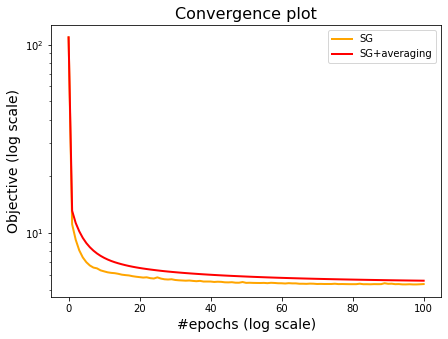

In [ ]:
# Comparison of stochastic gradient with and without averaging
nb_epochs = 100
n = pblinreg.n
w0 = np.zeros(d)


    # Run standard stochastic gradient without averaging
_, obj_a =stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1)
    # Run stochastic gradient with averaging
_, obj_b =stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1,average=1)

# Plot the results
plt.figure(figsize=(7, 5))

plt.semilogy(obj_a,label='SG',color='orange',lw=2)
plt.semilogy(obj_b,label='SG+averaging',color='red', lw=2)
    
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

**Diagonal Scaling**

In [ ]:
# Comparison of stochastic gradient with and without diagonal scaling

nb_epochs = 60
n = pblinreg.n
w0 = np.zeros(d)

# Stochastic gradient (batch size 1) without diagonal scaling
w_a, obj_a= stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1)
# Stochastic gradient (batch size 1) with RMSProp diagonal scaling
w_b, obj_b = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1,average=0,scaling=1)
# Stochastic gradient (batch size 1) with Adagrad diagonal scaling - Constant step size
w_c, obj_c = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1,average=0,scaling=2)
# Stochastic gradient (batch size 1) with Adagrad diagonal scaling - Decreasing step size
w_d, obj_d = stoch_grad(w0,pblinreg, lr=0.0001, n_iter=nb_epochs*n,nb=1,average=0,scaling=2)

<function matplotlib.pyplot.show>

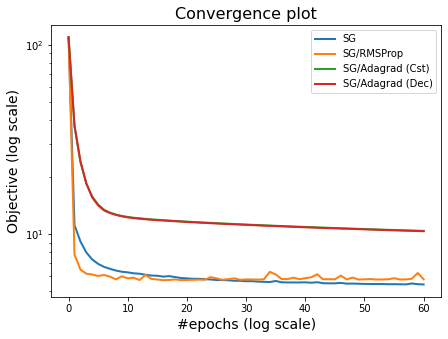

In [ ]:
# Plot the results - Comparison of stochastic gradient with and without diagonal scaling
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(obj_a, label="SG", lw=2)
plt.semilogy(obj_b, label="SG/RMSProp", lw=2)
plt.semilogy(obj_c, label="SG/Adagrad (Cst)", lw=2)
plt.semilogy(obj_d, label="SG/Adagrad (Dec)", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs (log scale)", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()
plt.show

# Regression (Lasso with iterative soft thersholding)

**Lasso regression with ISTA**

In [ ]:
#Minimization fucntion with l1 norm (Lasso regression)
def cost(w, X, y, lbda):
  return np.square(X.dot(w) - y).mean() + lbda * norm(w,1) 

In [ ]:
def ista_solve(  A, d, lbdaa ):
    """
     Iterative soft-thresholding solves the minimization problem
     Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    """
    max_iter = 300
    objvals = []
    tol = 10**(-3)
    tau = 1.5/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    for j in range(max_iter):
      z = w - tau*(A.T@(A@w-d))
      w_old = w
      w = np.sign(z) * np.maximum(np.abs(z)-tau*lbdaa,  np.zeros(z.shape))
      if j % 100 == 0:
        obj = cost(w,A,d,lbdaa)
        objvals.append(obj)
      if np.linalg.norm(w - w_old) < tol:
        break
    return w, objvals

In [ ]:
#we iterate over multiple values of lambda
lmbdas = [0.000001, 0.000002, 0.00001, 0.00002, 0.0001, 0.0002, 0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 1, 2, 10, 20]
mse_list=[]
for lda in lmbdas:
  w_star, obj_x = ista_solve_hot( x_train, y_train, lda)
  mse_list.append(obj_x[-1])

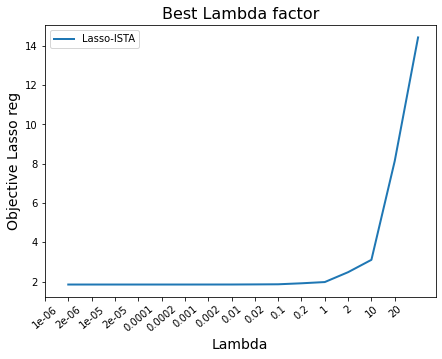

In [ ]:
x_range = range(1,len(lmbdas)+1)
plt.figure(figsize=(7, 5))
plt.plot(x_range,mse_list, label="Lasso-ISTA", lw=2)

plt.title("Best Lambda factor", fontsize=16)
plt.xlabel("Lambda", fontsize=14)
plt.xticks(np.arange(len(lmbdas)),lmbdas,rotation=40)
plt.ylabel("Objective Lasso reg", fontsize=14)
plt.legend()
plt.show()

In [ ]:
w_star, obj_x = ista_solve_hot( x_train, y_train, 0.00001)

# Performance on Test set

In [ ]:
#MSE on lasso-ISTA
cost(w_star, x_valid, y_valid, 0.00001)

1.843311215168409

In [ ]:
# MSE on best sgd algo
cost(w_b, x_valid, y_valid, 0.00001)

5.750756538528328